<a href="https://colab.research.google.com/github/dilek-gokalp/dilek-gokalp/blob/main/mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
E=4208
P=3916
N = E+P
P_E = E/N
p_P = P/N
Entropy = -P_E*np.log2(P_E)-p_P*np.log2(p_P)
print(Entropy)

0.9990678968724603


In [ ]:
import numpy as np

def entropy(class_counts):
    total = sum(class_counts)
    if total == 0:
        return 0
    probabilities = [count / total for count in class_counts if count > 0]
    return -sum(p * np.log2(p) for p in probabilities)

cap_color_data = {
    "Gray": [1000, 900],
    "Yellow": [1300,1100],
    "White": [1508,1412],
    "Red": [400,504]
}
Total_mushrooms = sum(sum(values) for values in cap_color_data.values())
E,P = 4208,3916
Entropy_total = entropy([E,P])

Weighted_entropy = sum(sum(values) / Total_mushrooms * entropy(values) for values in cap_color_data.values())
Information_gain = Entropy_total - Weighted_entropy
print(f"Information Gain for Cap-color: {Information_gain:.4f}")

Information Gain for Cap-color: 0.0024


In [ ]:
# Step 3: Encode Categorical Data
label_encoder = LabelEncoder()
for column in data.columns:
    data[column] = label_encoder.fit_transform(data[column])

In [ ]:
# Step 4: Split Data into Features and Target
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Step 5: Define Models and Metrics
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, report

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, report

In [ ]:
import numpy as np

# Given dataset values
total_mushrooms = 8124  # Total number of mushrooms

# Subgroup counts based on odor
odor_groups = {
    "Almond": {"E": 2000, "P": 0, "Total": 2000, "Prob": 2000 / total_mushrooms},
    "Pungent": {"E": 0, "P": 1900, "Total": 1900, "Prob": 1900 / total_mushrooms},
    "None": {"E": 900, "P": 2224, "Total": 3124, "Prob": 3124 / total_mushrooms},
    "Spice": {"E": 808, "P": 292, "Total": 1100, "Prob": 1100 / total_mushrooms}
}

# Given entropy values for each subgroup
entropy_values = {
    "Almond": 0,    # Entropy is 0 because all are edible
    "Pungent": 0,   # Entropy is 0 because all are poisonous
    "None": 0.897,
    "Spice": 0.836
}

# Compute Weighted Entropy
weighted_entropy = sum(odor_groups[key]["Prob"] * entropy_values[key] for key in odor_groups)

# Compute Information Gain
H_class = 0.999  # Entropy of the entire dataset
IG_odor = H_class - weighted_entropy

# Print result
print(f"Information Gain for 'Odor': {IG_odor:.3f}")


Information Gain for 'Odor': 0.541


In [ ]:
E = 4208
P = 3916
N = E+P
P_E = E/N
p_P = P/N
error_rate =min(P_E,p_P) # Changed Error_rate to error_rate
print(f"Expected Misclassification Rate : {error_rate:.4f}")

Expected Misclassification Rate : 0.4820


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
url = 'https://raw.githubusercontent.com/usmanakhtar/Mushrooms-dataset/master/mushrooms.csv'
data = pd.read_csv(url)

# Encode categorical data into numbers
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

# Define features (X) and target variable (y)
X = data_encoded.drop('class', axis=1)  # Features
y = data_encoded['class']  # Target variable (edible or poisonous)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print('---' * 10)

# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test)

# Decision Tree Classifier
print("Decision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test)

# Logistic Regression
print("Logistic Regression:")
log_reg_model = LogisticRegression(random_state=42)
evaluate_model(log_reg_model, X_train, X_test, y_train, y_test)

# Support Vector Classification (SVC)
print("Support Vector Classification (SVC):")
svc_model = SVC(random_state=42)
evaluate_model(svc_model, X_train, X_test, y_train, y_test)

# K-Nearest Neighbors (KNN)
print("K-Nearest Neighbors (KNN):")
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test)


Random Forest Classifier:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------
Decision Tree Classifier:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
------------------------------
Logistic Regression:


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F1-Score: 0.94
------------------------------
Support Vector Classification (SVC):
Accuracy: 0.99
Precision: 1.00
Recall: 0.99
F1-Score: 0.99
------------------------------
K-Nearest Neighbors (KNN):
Accuracy: 1.00
Precision: 0.99
Recall: 1.00
F1-Score: 1.00
------------------------------


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the dataset directly from the URL
url = 'https://raw.githubusercontent.com/usmanakhtar/Mushrooms-dataset/master/mushrooms.csv'
data = pd.read_csv(url)

# Show the first few rows of the dataset
print(data.head())


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

In [ ]:
# Get basic information about the dataset
print(data.info())

# Check for missing values (if any)
print(data.isnull().sum())

# Show the distribution of the 'class' (edible vs poisonous)
print(data['class'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

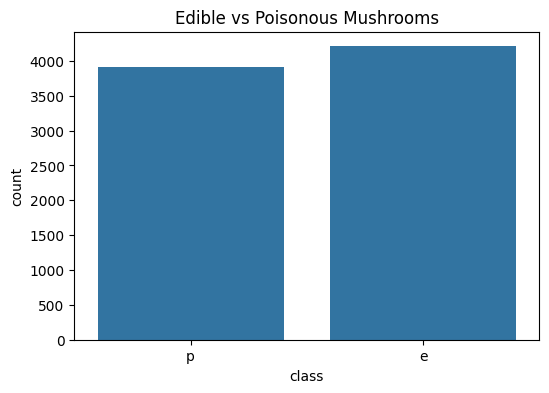

In [ ]:
# Plot the count of edible vs poisonous mushrooms
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=data)
plt.title('Edible vs Poisonous Mushrooms')
plt.show()


In [ ]:
# Encode categorical data into numeric values
label_encoder = LabelEncoder()
data_encoded = data.apply(label_encoder.fit_transform)

# Show the first few rows of the encoded dataset
print(data_encoded.head())


   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [ ]:
# Define features (X) and target variable (y)
X = data_encoded.drop('class', axis=1)  # All columns except 'class'
y = data_encoded['class']  # 'class' column is the target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}')


Training set size: 6499, Test set size: 1625


In [ ]:
# Create a Decision Tree Classifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model with the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

